#### sklearn.linear_model.LogisticRegression
* class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
df_titanic = pd.read_csv('../datasets/titanic_train.csv')
df_titanic = df_titanic.loc[:,['Survived', 'Sex', 'Age', 'Pclass']]
X = df_titanic.loc[:,['Sex', 'Age', 'Pclass']]
y = df_titanic['Survived']
X['Age'].fillna(method='ffill', inplace=True)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
labels = encoder.fit_transform(X['Sex'])
X['Sex'] = labels
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X[['Age']])
age_scaled = scaler.transform(X[['Age']])
X['Age']=age_scaled

#### sklearn.metrics.recall_score
* sklearn.metrics.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')

#### sklearn.metrics.confusion_matrix
* sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)

In [86]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
def get_clf_eval(y_test, pred) :
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1score = f1_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print(f'정확도: {accuracy:^.4f}, 정밀도: {precision:^.4f}, 재현율: {recall:^.4f}, f1score: {f1score:^.4f}')

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차행렬
[[101  17]
 [ 12  49]]
정확도: 0.8380, 정밀도: 0.7424, 재현율: 0.8033, f1score: 0.7717


In [88]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
# 예측확률 array 와 예측 겨과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 학인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측\n',pred_proba_result[:3])

pred_proba()결과 Shape : (179, 2)
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측
 [[0.42558527 0.57441473 1.        ]
 [0.88833758 0.11166242 0.        ]
 [0.88651722 0.11348278 0.        ]]


#### sklearn.preprocessing.Binarizer
* class sklearn.preprocessing.Binarizer(*, threshold=0.0, copy=True)

In [89]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값, 분류 결정 임곗값임.
custom_threshold = 0.5

# pred_proba() 반환값의 두번째 컬럼, 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[101  17]
 [ 12  49]]
정확도: 0.8380, 정밀도: 0.7424, 재현율: 0.8033, f1score: 0.7717


In [90]:


# Binarizer의 threshold 설정값, 분류 결정 임곗값임.
custom_threshold = 0.4

# pred_proba() 반환값의 두번째 컬럼, 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[94 24]
 [10 51]]
정확도: 0.8101, 정밀도: 0.6800, 재현율: 0.8361, f1score: 0.7500


In [91]:
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    #threshold list 객체 내 값을 차례로 iteration하면서 evaluation 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값:', custom_threshold)
        get_clf_eval(y_test, custom_predict)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임계값: 0.4
오차행렬
[[94 24]
 [10 51]]
정확도: 0.8101, 정밀도: 0.6800, 재현율: 0.8361, f1score: 0.7500
임계값: 0.45
오차행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197, f1score: 0.7576
임계값: 0.5
오차행렬
[[101  17]
 [ 12  49]]
정확도: 0.8380, 정밀도: 0.7424, 재현율: 0.8033, f1score: 0.7717
임계값: 0.55
오차행렬
[[107  11]
 [ 17  44]]
정확도: 0.8436, 정밀도: 0.8000, 재현율: 0.7213, f1score: 0.7586
임계값: 0.6
오차행렬
[[111   7]
 [ 21  40]]
정확도: 0.8436, 정밀도: 0.8511, 재현율: 0.6557, f1score: 0.7407


#### sklearn.metrics.precision_recall_curve
* sklearn.metrics.precision_recall_curve(y_true, probas_pred, *, pos_label=None, sample_weight=None)

In [92]:
from sklearn.metrics import precision_recall_curve

#레이블 값이 1일때의 예츠그 확률울 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

#실제값 데이터셋과 레이블값이 1일 때의 예측 확률을 precision_recall_curve인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)

print('반환된 분류 결정 임곗값 배열의 shape', thresholds.shape)
print('반환된 precisions 배열의 shape', precisions.shape)
print('반환된 recalls 배열의 shape', recalls.shape)
print("\nthresholds 5 samples:", thresholds[:5])
print("precisions 5 samples:", precisions[:5])
print("recalls 5 samples:", recalls[:5])

반환된 분류 결정 임곗값 배열의 shape (124,)
반환된 precisions 배열의 shape (125,)
반환된 recalls 배열의 shape (125,)

thresholds 5 samples: [0.06556004 0.07136752 0.0776467  0.07896181 0.08303016]
precisions 5 samples: [0.34078212 0.34269663 0.34659091 0.35057471 0.35465116]
recalls 5 samples: [1. 1. 1. 1. 1.]


In [93]:
precisions.shape

(125,)

In [94]:
recalls.shape

(125,)

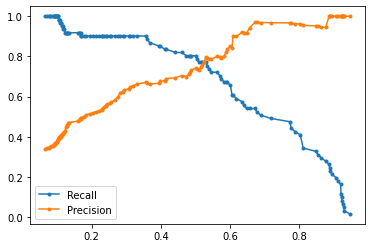

In [95]:
import matplotlib.pyplot as plt

plt.plot(thresholds, recalls[0:124] , marker='.', label='Recall')
plt.plot(thresholds, precisions[0:124], marker='.', label='Precision')
plt.legend()
plt.show()

#### sklearn.metrics.roc_curve
* sklearn.metrics.roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)

#### sklearn.metrics.roc_auc_score
* sklearn.metrics.roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)

In [96]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일 때 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]
fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

# 반환된 임계값 배열 로우가 47건이므로 샘플로 10건만 추출하되 임계값을 5step으로 추출
# thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임계값 배열의 index 10개: ', thr_index)
print('샘플용 10개의 임계값: ', np.round(thresholds[thr_index], 2))

# 5 step으로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임계값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임계값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임계값 배열의 index 10개:  [ 1  6 11 16 21 26 31 36 41 46 51 56 61 66]
샘플용 10개의 임계값:  [0.95 0.81 0.65 0.6  0.55 0.47 0.4  0.27 0.18 0.13 0.12 0.11 0.1  0.08]
샘플 임계값별 FPR:  [0.    0.008 0.025 0.059 0.102 0.178 0.212 0.314 0.466 0.542 0.678 0.754
 0.839 0.941]
샘플 임계값별 TPR:  [0.016 0.344 0.541 0.656 0.721 0.803 0.852 0.902 0.902 0.918 0.934 0.967
 1.    1.   ]


In [97]:
# plt.plot(fprs[0:10], marker= '.', label='fprs')
# plt.plot(tprs[0:10], marker= '.', label='tprs')
# plt.legend()
# plt.show()

In [98]:
def roc_curve_plot(y_test, pred_proba_class1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
    # ROC Curve를 plot 곡선으로 그림
    plt.plot(fprs, tprs, label = 'ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1], [0,1], 'k--', label='Random')
    # FPR X축의 scale을 0.1 단위로 변경, X, Y 축명 설정등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()
    


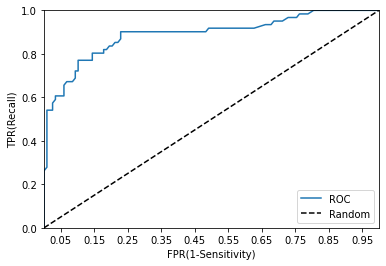

In [99]:
roc_curve_plot(y_test, pred_proba_class1)